# Word2Vec Embedding Dimension Analysis

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
colors=["rgb(255,0,0)", "rgb(0,255,0)", "rgb(0,0,255)", "rgb(255,255,0)", "rgb(255,0,255)", 
        "rgb(0,255,255)", "rgb(127,0,255)", "rgb(255,128,0)","rgb(255,0,127)", "rgb(128,128,128)"]

In [3]:
def silhouette_analysis(vector):
    max_silhouette = (0, -1)

    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(vector)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(vector, cluster_labels)
        if max_silhouette[1] < silhouette_avg:
            max_silhouette = (n_clusters, silhouette_avg)
        
    print("For n_clusters =", max_silhouette[0], "The Best average silhouette_score is :", max_silhouette[1])

    return max_silhouette

## Word2Vec Embedding

In [4]:
import os, sys
sys.path.append(os.path.split(os.getcwd())[0])

from WordVector import WordVector

In [5]:
import data_helper
_,_,relation = data_helper.get_triplet()
relation[:5]

['cause', 'cause', 'cause', 'cause', 'cause']

In [6]:
relation = list(set(relation))
relation[:5]

['acquire', 'constitute', 'cause', 'effective', 'catheter-relate']

In [7]:
relation.remove('eon')

In [8]:
corpus = data_helper.get_corpus()

## Silhouette Score Analysis by Dimensionality

In [9]:
dims = [3, 5, 7, 10, 20, 40, 60, 80, 100]

In [10]:
best_n_cluster = []
best_scores = []

for d in dims:
    wv = WordVector(relation, train_corpus=corpus, dim=d)
    print("Word Vector Dimension: {0}".format(wv.dim))
    
    score = silhouette_analysis(wv.vector)
    best_n_cluster.append(score[0])
    best_scores.append(score[1])

Loading a pre-trained model...
Load success!
Word Vector Dimension: 3
For n_clusters = 8 The Best average silhouette_score is : 0.421457
Loading a pre-trained model...
Load success!
Word Vector Dimension: 5
For n_clusters = 2 The Best average silhouette_score is : 0.258444
Loading a pre-trained model...
Load success!
Word Vector Dimension: 7
For n_clusters = 6 The Best average silhouette_score is : 0.207154
Loading a pre-trained model...
Load success!
Word Vector Dimension: 10
For n_clusters = 3 The Best average silhouette_score is : 0.177004
Loading a pre-trained model...
Load success!
Word Vector Dimension: 20
For n_clusters = 2 The Best average silhouette_score is : 0.15241
Loading a pre-trained model...
Load success!
Word Vector Dimension: 40
For n_clusters = 10 The Best average silhouette_score is : 0.119632
Loading a pre-trained model...
Load success!
Word Vector Dimension: 60
For n_clusters = 9 The Best average silhouette_score is : 0.122866
Loading a pre-trained model...
Load s

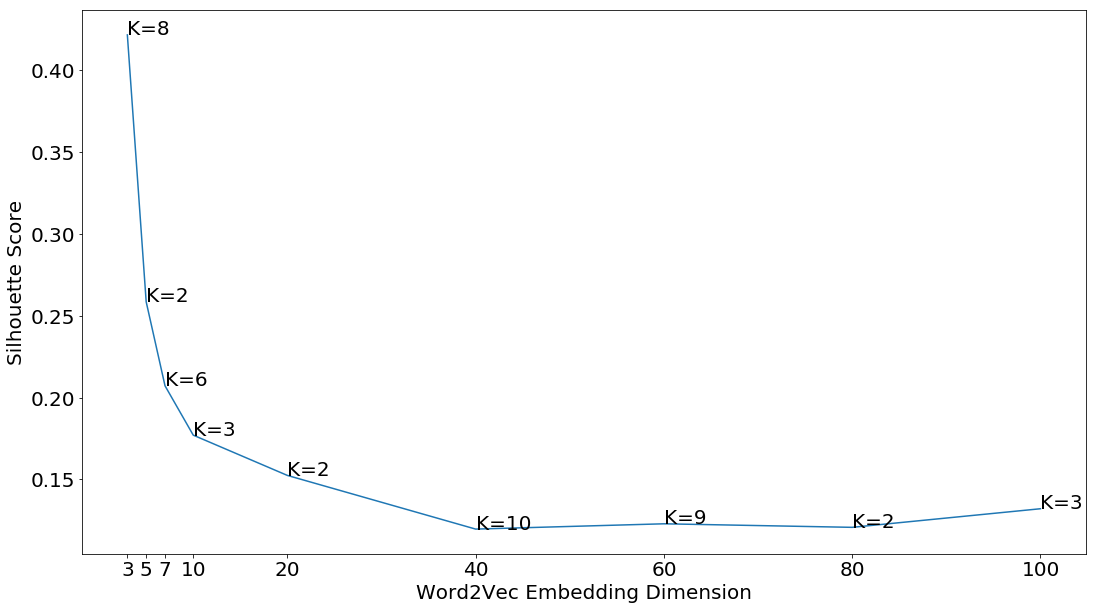

In [13]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.tick_params(labelsize=20)


plt.plot(dims, best_scores)
plt.xlabel('Word2Vec Embedding Dimension', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.xticks(dims, dims)

for i in range(len(dims)):
    ax.annotate('K=%d' % best_n_cluster[i], xy=(dims[i],best_scores[i]), textcoords='data', fontsize=20)
    
plt.show()